In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas.plotting import autocorrelation_plot as auto_corr

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

In [3]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')
test_df = pd.read_csv('test.csv')

<ipython-input-3-63f26dd202f7>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [4]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
378603,40,74,2012-02-03,7831.03,False
378604,40,74,2012-02-10,9510.72,True
378605,40,74,2012-02-17,8835.98,False
378606,40,74,2012-02-24,11423.07,False


In [7]:
df = train_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner').set_index('Date')
df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2010-02-05,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2010-02-05,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2010-02-05,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2010-02-05,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


<Axes: xlabel='IsHoliday_x', ylabel='Weekly_Sales'>

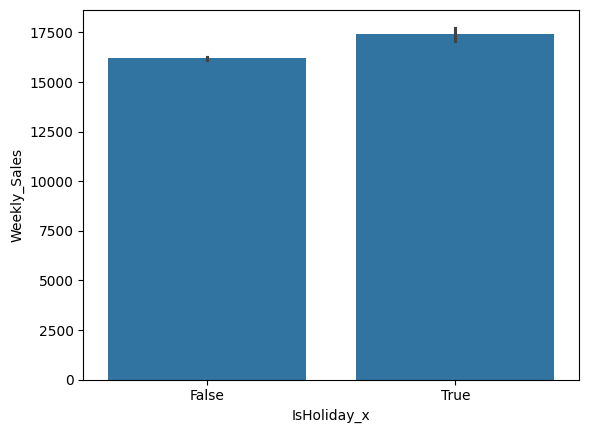

In [8]:
import seaborn as sns

sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=df.reset_index())


In [9]:
df_sales=pd.DataFrame(df['Weekly_Sales'])
df_sales

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-05,50605.27
2010-02-05,13740.12
2010-02-05,39954.04
2010-02-05,32229.38
...,...
2012-10-26,134.01
2012-10-26,189.00
2012-10-26,6056.88


Text(0, 0.5, 'Sales')

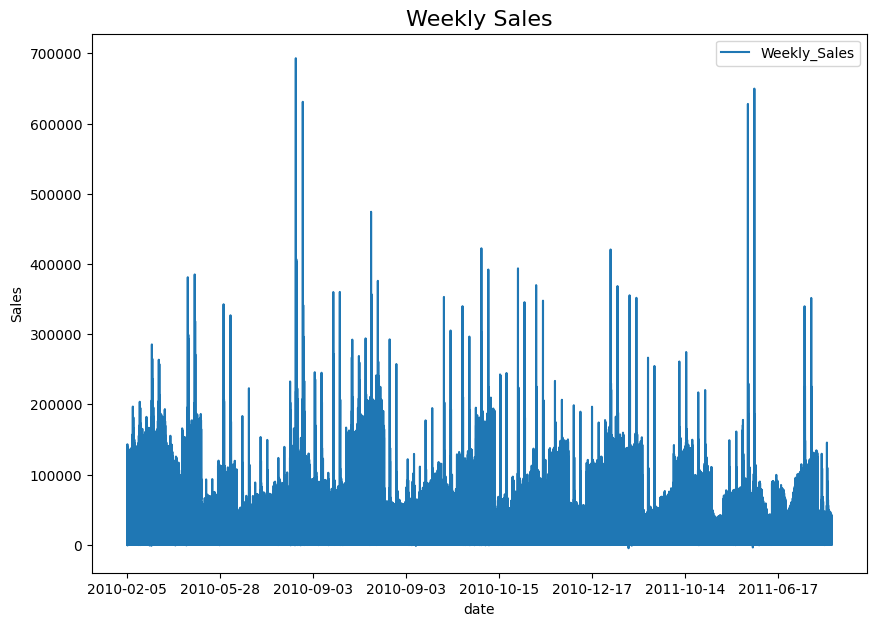

In [10]:
df_sales.plot(figsize=(10,7))
plt.title('Weekly Sales',fontsize=16)
plt.xlabel('date')
plt.ylabel('Sales')

In [11]:
time_step=df_sales.index.to_numpy()
sales=df_sales['Weekly_Sales'].values.astype('float32')
time_step[:10],sales[:10]

(array(['2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
        '2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
        '2010-02-05', '2010-02-05'], dtype=object),
 array([24924.5 , 50605.27, 13740.12, 39954.04, 32229.38,  5749.03,
        21084.08, 40129.01, 16930.99, 30721.5 ], dtype=float32))

In [12]:
split_size=int(0.8*len(sales))
print(split_size)

302886


In [13]:
train_time,train_sales=time_step[:split_size],sales[:split_size]
test_time,test_sales=time_step[split_size:],sales[split_size:]
len(train_time),len(test_time),len(train_sales),len(test_sales)

(302886, 75722, 302886, 75722)

In [14]:
train_time[0:10]

array(['2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
       '2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
       '2010-02-05', '2010-02-05'], dtype=object)

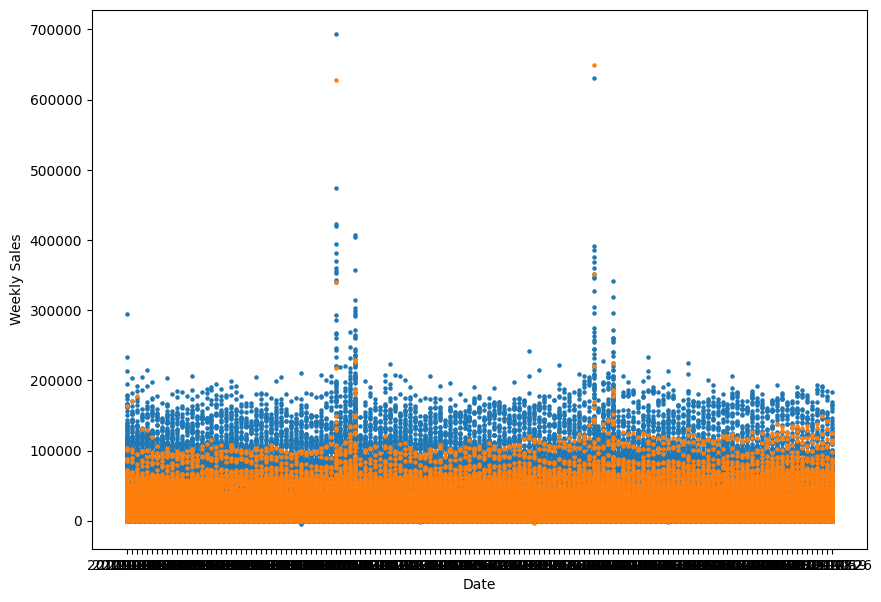

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(train_time, train_sales, s=5, label="Train data")
plt.scatter(test_time, test_sales, s=5, label="Test data")
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [16]:
import torch
def create_dataset(dataset, step):
    x, y = [], []
    for i in range(len(dataset)-step):
        feature = dataset[i:i+step]
        target = dataset[i+step:i+step+1]
        x.append(feature)
        y.append(target)
    return torch.tensor(x), torch.tensor(y)

In [17]:
x_train, y_train = create_dataset(train_sales, step=7)
x_test, y_test = create_dataset(test_sales, step=7)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


<ipython-input-16-e1618a39a9d8>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(x), torch.tensor(y)


torch.Size([302879, 7]) torch.Size([302879, 1])
torch.Size([75715, 7]) torch.Size([75715, 1])


In [18]:
import torch.nn as nn
class WeeklySalesModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=7, hidden_size=2, num_layers=1, batch_first=True)
        self.linear = nn.Linear(2, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x


In [24]:
import torch.optim as optim
import torch.utils.data as data

model = WeeklySalesModel()
optimizer = optim.Adam(model.parameters(),)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(x_train, y_train), shuffle=True, batch_size=8)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 50 == 0:
      model.eval()
      with torch.no_grad():
        y_pred = model(x_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(x_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d has the result: train RMSE %.2f, test RMSE %.2f" % (epoch, train_rmse, test_rmse))

Epoch 0 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 1 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 2 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 3 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 4 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 5 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 6 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 7 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 8 has the result: train RMSE 29513.86, test RMSE 21937.25
Epoch 9 has the result: train RMSE 29513.86, test RMSE 21937.25
